<a href="https://colab.research.google.com/github/karthik111/video_anomaly_detection/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 91.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.6/532.6 kB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [8]:
!pwd

/content


In [9]:
!unzip processed.zip

Archive:  processed.zip
   creating: processed/abuse/
  inflating: processed/abuse/anomaly_1_abuse028_x264.mp4.pt  
  inflating: processed/abuse/anomaly_1_abuse030_x264.mp4.pt  
   creating: processed/arrest/
  inflating: processed/arrest/anomaly_1_arrest001_x264.mp4.pt  
  inflating: processed/arrest/anomaly_1_arrest007_x264.mp4.pt  
  inflating: processed/arrest/anomaly_1_arrest024_x264.mp4.pt  
  inflating: processed/arrest/anomaly_1_arrest030_x264.mp4.pt  
  inflating: processed/arrest/anomaly_1_arrest039_x264.mp4.pt  
   creating: processed/arson/
  inflating: processed/arson/anomaly_1_arson007_x264.mp4.pt  
  inflating: processed/arson/anomaly_1_arson009_x264.mp4.pt  
  inflating: processed/arson/anomaly_1_arson010_x264.mp4.pt  
  inflating: processed/arson/anomaly_1_arson011_x264.mp4.pt  
  inflating: processed/arson/anomaly_1_arson016_x264.mp4.pt  
  inflating: processed/arson/anomaly_1_arson018_x264.mp4.pt  
  inflating: processed/arson/anomaly_1_arson022_x264.mp4.pt  
  infla

In [13]:
!python naive_classifier.py

Accuracy: 0.6966292134831461
AUC Score: 0.7203389830508474
Figure(640x480)
Accuracy scores: [0.61797753 0.64044944 0.58426966 0.5        0.70454545]
Average accuracy: 0.6094484167517875
Figure(640x480)
/content/processed/shooting/anomaly_1_shooting008_x264.mp4.pt
/content/processed/burglary/anomaly_1_burglary037_x264.mp4.pt
/content/processed/shooting/anomaly_1_shooting024_x264.mp4.pt
/content/processed/normal/begin_1_shoplifting021_x264.mp4.pt
/content/processed/roadaccidents/anomaly_1_roadaccidents009_x264.mp4.pt
/content/processed/testing_normal_videos_anomaly/normal_videos_925_x264.pt
/content/processed/normal/begin_1_explosion004_x264.mp4.pt
/content/processed/shoplifting/anomaly_2_shoplifting007_x264.mp4.pt
/content/processed/normal/begin_1_shoplifting010_x264.mp4.pt
/content/processed/shooting/anomaly_1_shooting037_x264.mp4.pt
/content/processed/roadaccidents/anomaly_1_roadaccidents019_x264.mp4.pt
/content/processed/normal/begin_1_explosion029_x264.mp4.pt
/content/processed/norm

In [11]:
!ls

kart.mov  naive_classifier.py  processed  processed.zip  requirements.txt  sample_data


In [ ]:
# prompt: spilt a video into 32 frame segments using torch video or hugging face video

import torch
from torchvideotransforms import (
    RandomCrop,
    CenterCrop,
    RandomHorizontalFlip,
    Normalize,
    ToFloatTensor,
    VideoDecoder,
)
from torchvideo.transforms import (
    UniformTemporalSubsample,
)

def split_video(video_path, output_dir):
    """
    Splits a video into 32 frame segments and saves them to the output directory.

    Args:
        video_path (str): Path to the input video.
        output_dir (str): Path to the output directory.
    """

    # Open the video and get its metadata.
    video = VideoDecoder(video_path)
    num_frames = video.get_num_frames()
    width = video.get_width()
    height = video.get_height()

    # Create the output directory if it doesn't exist.
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Split the video into 32 frame segments.
    for i in range(0, num_frames, 32):
        # Get the frames for the current segment.
        frames = video.get_frames(i, i + 32)

        # Convert the frames to tensors.
        frames = ToFloatTensor(frames)

        # Normalize the frames.
        frames = Normalize(frames, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

        # Save the frames to the output directory.
        output_path = os.path.join(output_dir, f"{i}.pt")
        torch.save(frames, output_path)

if __name__ == "__main__":
    # Split the video into 32 frame segments.
    split_video("video.mp4", "output")


In [15]:
pip install decord

  Using cached decord-0.6.0-py3-none-manylinux2010_x86_64.whl (13.6 MB)


In [3]:
from decord import VideoReader
from decord import cpu, gpu

In [4]:
vr = VideoReader('kart.mov', ctx=cpu(0))
# a file like object works as well, for in-memory decoding

print('video frames:', len(vr))
# 1. the simplest way is to directly access frames
for i in range(len(vr)):
    # the video reader will handle seeking and skipping in the most efficient manner
    frame = vr[i]
    print(frame.shape)


video frames: 240
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080, 1620, 3)
(1080,

In [5]:
frames = vr.get_batch(range(32))
print(frames.shape)

(32, 1080, 1620, 3)


In [6]:
frames.asnumpy()[0].shape

(1080, 1620, 3)

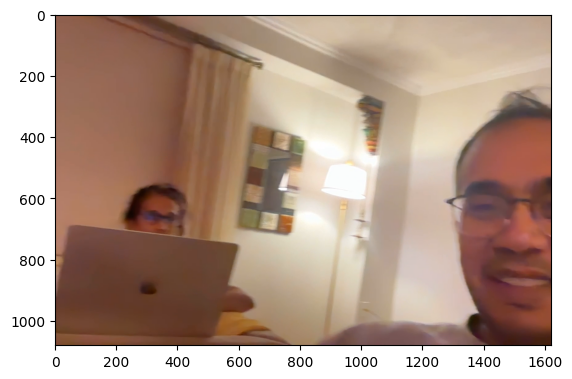

In [7]:
import matplotlib.pyplot as plt
plt.imshow(frames.asnumpy()[30])
plt.show()

In [31]:
!pip install av

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 51.3 MB/s eta 0:00:00


In [1]:
from torchvision.io import write_video
import torch

In [8]:
write_video("output.mp4", frames.asnumpy(), fps=30)

In [24]:
vr.get_avg_fps()

30.0

Split video into 32 equal sized segments, store them as such, and then for each 16 frame set with the segment, call the Feature Extractor.   Average of extracted feature scores for all frames within the Segment becomes the feature vector for that Segment

In [26]:
file_name = 'kart.mov'
vr = VideoReader(file_name, ctx=cpu(0))

NUM_SEGMENTS = 32
NUM_FRAMES = 16

file_num = 1
for i in range(0, len(vr), NUM_SEGMENTS):
    # Get the frames for the current segment.
    frames = vr.get_batch(range(i, min(i + NUM_SEGMENTS, len(vr))))
    #print(i, min(i + NUM_SEGMENTS, len(vr)))
    frames = vr.get_batch(range(i, min(i + NUM_SEGMENTS, len(vr)))
    # Save the frames to the output directory.
    write_video(os.path.splitext(file_name)[0] + '_' + str(file_num) + os.path.splitext(file_name)[1], frames.asnumpy(), fps=vr.get_avg_fps())
    file_num+=1

0 32
32 64
64 96
96 128
128 160
160 192
192 224
224 240


In [24]:
# prompt: code for inline number comparision and return a value

max(1, 10)


SyntaxError: invalid syntax (<ipython-input-24-9ae953e4adcc>, line 1)

In [20]:
32*8

256